In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

### 실습 과제 1. Boston_house_small 데이터를 활용한 PCA + regression 실습

#### 1) 데이터 불러온 후 train_data : test_data = 7:3 split, random_state=10
** 종속변수는 ‘Target', 독립변수는 나머지 변수

In [31]:
df = pd.read_csv("./data/Boston_house_small.csv")

df.shape

(60, 14)

In [32]:
df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,40.3,392.92,5.762,2.81838,4.0983,18.10,10.42,0.532,20.2,24,0.0,666,0,21.8
1,59.7,24.65,5.837,12.24720,1.9976,18.10,15.69,0.584,20.2,24,0.0,666,0,10.2
2,91.7,396.90,6.142,1.23247,3.9769,8.14,18.72,0.538,21.0,4,0.0,307,0,15.2
3,52.6,390.30,7.470,0.54050,2.8720,3.97,3.16,0.575,13.0,5,20.0,264,0,43.5
4,100.0,366.15,6.216,9.23230,1.1691,18.10,9.53,0.631,20.2,24,0.0,666,0,50.0


In [33]:
df.describe(include="all")

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,68.041667,354.305333,6.318433,3.102863,3.901313,10.775833,12.076167,0.552950,18.691667,9.950000,9.983333,410.116667,0.033333,22.955000
std,27.135150,91.194366,0.699257,5.540228,2.326631,7.016623,6.163047,0.106549,1.970829,9.018672,23.614303,180.034280,0.181020,10.373098
min,6.500000,10.480000,5.155000,0.014320,1.169100,1.320000,2.470000,0.398000,13.000000,2.000000,0.000000,187.000000,0.000000,7.000000
25%,52.400000,374.197500,5.866500,0.128445,2.260625,5.130000,6.632500,0.462500,17.875000,4.000000,0.000000,276.000000,0.000000,16.225000
50%,71.650000,392.080000,6.177000,0.289365,3.290150,8.140000,12.830000,0.538000,19.150000,5.000000,0.000000,320.500000,0.000000,21.250000
75%,90.950000,396.900000,6.565000,4.094135,4.575800,18.100000,15.715000,0.616500,20.200000,24.000000,0.000000,666.000000,0.000000,24.850000
max,100.000000,396.900000,8.337000,28.655800,12.126500,27.740000,30.810000,0.871000,21.200000,24.000000,100.000000,711.000000,1.000000,50.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      60 non-null     float64
 1   B        60 non-null     float64
 2   RM       60 non-null     float64
 3   CRIM     60 non-null     float64
 4   DIS      60 non-null     float64
 5   INDUS    60 non-null     float64
 6   LSTAT    60 non-null     float64
 7   NOX      60 non-null     float64
 8   PTRATIO  60 non-null     float64
 9   RAD      60 non-null     int64  
 10  ZN       60 non-null     float64
 11  TAX      60 non-null     int64  
 12  CHAS     60 non-null     int64  
 13  Target   60 non-null     float64
dtypes: float64(11), int64(3)
memory usage: 6.7 KB


In [35]:
from sklearn.model_selection import train_test_split

X = df.drop(labels="Target", axis=1)
Y = df["Target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(42, 13) (18, 13) (42,) (18,)


#### 2) PCA 수행해서 주성분(principal component) 개수에 따른 mean squared Error 그래프 그리고, principal component 개수에 따른 PCA의 explained_variance_ratio 구하기
**cross_val_score 함수 이용해서(cv=5) principal component 5개까지 mean squared error 구하기
 

Text(0.5, 1.0, 'hp')

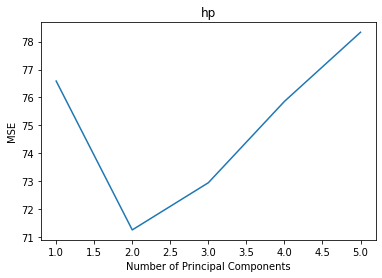

In [36]:
from sklearn import svm

pca = PCA()

mse_list = list()
X_train_pca = pca.fit_transform(scale(X_train))

for idx in np.arange(1, 6):
    score = -1 * cross_val_score(svm.SVR(),
                                 X_train_pca[:, :idx], Y_train, 
                                 cv=5, scoring="neg_mean_squared_error").mean()
    mse_list.append(score)

num_pca = np.arange(1, 6)
plt.plot(num_pca, mse_list)
plt.xlabel("Number of Principal Components")
plt.ylabel("MSE")
plt.title("hp")

In [37]:
print("Explaned variance per principal component: {}".format(pca.explained_variance_ratio_))
print("Cumulative sum: {}".format(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=13) * 100)))

Explaned variance per principal component: [0.4903983  0.10552172 0.08436537 0.07794373 0.06522836 0.05725848
 0.04260774 0.02852523 0.01583058 0.01303964 0.01268944 0.00498424
 0.00160716]
Cumulative sum: [ 49.03983021  59.59200251  68.0285391   75.82291215  82.34574858
  88.07159624  92.3323699   95.18489305  96.76795114  98.07191534
  99.34085954  99.83928368 100.        ]


#### 3) 가장 작은 mean squared error 가지는 주성분 개수로  PCA 수행하고, regression을 하기. 검증 데이터(test data)에 대한 mean squared error 구하고,  모델의 R^2 구하기

In [38]:
from sklearn.model_selection import GridSearchCV

pca_optimal = PCA(n_components=2)

X_train_pca = pca_optimal.fit_transform(scale(X_train))
X_test_pca = pca_optimal.transform(scale(X_test))

parameter_grid = {"C" :[0.01, 0.1, 0.5, 1, 10, 100],
                  "gamma" : [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
                  "kernel" : ["rbf", "poly", "linear"]}
grid_model = GridSearchCV(svm.SVR(), parameter_grid, cv=5, return_train_score=True)
grid_model.fit(X_train_pca, Y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10, 100],
                         'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']},
             return_train_score=True)

In [39]:
best_parameter = grid_model.best_params_
print(f"Best parameter: {best_parameter}")

best_svm = grid_model.best_estimator_

Best parameter: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [40]:
Y_pred = best_svm.predict(X_test_pca)

mse_score = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("mse score :", mse_score)
print("r^2 score :", r2)

mse score : 63.84215883808492
r^2 score : 0.5277476787096314


#### 4)  PCA 없이 regression 하기. 검증 데이터(test data)에 대한 mean squared error 구하고,  모델이 R^2 구한 후 PCA를 수행한 결과와 비교하기

In [41]:
non_pca_svm = svm.SVR(C=100, gamma=0.1, kernel="rbf")
non_pca_svm.fit(X_train, Y_train)

SVR(C=100, gamma=0.1)

In [42]:
non_pca_Y_pred = non_pca_svm.predict(X_test)

non_pca_mse_score = mean_squared_error(Y_test, np.array(non_pca_Y_pred,dtype=np.float32))
non_pca_r2 = r2_score(Y_test, non_pca_Y_pred)
# non_pca_r2_score = r2_score(Y_test.astype(np.float32), np.array(non_pca_Y_pred,dtype=np.float32))
print("non pca mse score :", non_pca_mse_score)
print("non pca r^2 score :", non_pca_r2)

non pca mse score : 139.95304046500073
non pca r^2 score : -0.03525867920688852


### 실습 과제 2. Iris 데이터를 활용한 PCA + SVM 실습

#### 1) 데이터 불러온 후 train_data : test_data = 7:3 split, random_state=100
** 종속변수는 ‘Target', 독립변수는 나머지 변수

In [58]:
df = pd.read_csv("./data/Iris.csv")

print(df.shape)
df.head()

(150, 5)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [59]:
X = df.drop(labels="Species", axis=1)
Y = df["Species"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(105, 4) (45, 4) (105,) (45,)


#### 2) PCA 수행해서 주성분(principal component) 개수에 따른 accuracy그래프 그리기
**cross_val_score 함수 이용해서(cv=5) principal component 5개까지 accuracy 구하기

Text(0.5, 1.0, 'hp')

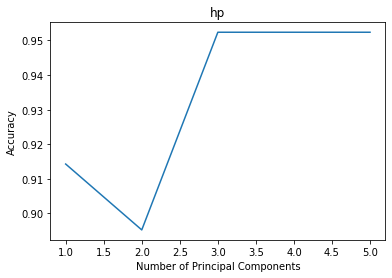

In [60]:
pca = PCA()

accuracy_list = list()
X_train_pca = pca.fit_transform(scale(X_train))

for idx in np.arange(1, 6):
    score = cross_val_score(svm.SVC(), 
                            X_train_pca[:, :idx], Y_train, 
                            cv=5, scoring="accuracy").mean()
    accuracy_list.append(score)

num_pca = np.arange(1, 6)
plt.plot(num_pca, accuracy_list)
plt.xlabel("Number of Principal Components")
plt.ylabel("Accuracy")
plt.title("hp")

In [61]:
print("Explaned variance per principal component: {}".format(pca.explained_variance_ratio_))
print("Cumulative sum: {}".format(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4) * 100)))

Explaned variance per principal component: [0.72201925 0.23393497 0.03914811 0.00489767]
Cumulative sum: [72.2  95.59 99.5  99.99]


#### 3) 높은 accuracy 가지는 주성분 개수로 PCA 수행하고, 5-fold 교차 검증으로 SVM의 최적 하이퍼파라미터 구하기. 검증 데이터(test data)에 대한 최적 모델의 accuracy와 confusion matrix 구하기
** C: [0.01, 0.1, 0.5, 1, 10, 100], gamma: [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], kernel: ['rbf', 'poly', 'linear']

In [62]:
pca_optimal = PCA(n_components=3)

X_train_pca = pca_optimal.fit_transform(scale(X_train))
X_test_pca = pca_optimal.transform(scale(X_test))

parameter_grid = {"C" :[0.01, 0.1, 0.5, 1, 10, 100],
                  "gamma" : [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
                  "kernel" : ["rbf", "poly", "linear"]}
grid_model = GridSearchCV(svm.SVC(), parameter_grid, cv=5, return_train_score=True)
grid_model.fit(X_train_pca, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10, 100],
                         'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']},
             return_train_score=True)

In [73]:
best_parameter = grid_model.best_params_
print(f"Best parameter: {best_parameter}")

best_svm = grid_model.best_estimator_

Best parameter: {'C': 0.5, 'gamma': 1, 'kernel': 'linear'}


In [74]:
from sklearn import metrics

Y_pred = best_svm.predict(X_test_pca)

pca_confusion_mat = metrics.confusion_matrix(Y_test, Y_pred)
pca_accuracy_score = metrics.accuracy_score(Y_test, Y_pred)
# pca_f1_score = metrics.f1_score(Y_test, Y_pred)

print("pca accuracy score :", pca_accuracy_score)
# print("pca f1 score :", pca_f1_score)
print("-"*30)
print("confusion matrix :\n", pca_confusion_mat)

pca accuracy score : 0.9333333333333333
------------------------------
confusion matrix :
 [[16  0  0]
 [ 0 11  0]
 [ 0  3 15]]


#### 4) PCA 없이 최적 하이퍼파라미터로 SVM 모델 학습하기 , 검증 데이터(test data)에 대한 accuracy와 confusion matrix 구하기

In [71]:
non_pca_svm = svm.SVC(C=0.5, gamma=1, kernel="linear")
non_pca_svm.fit(X_train, Y_train)

SVC(C=0.5, gamma=1, kernel='linear')

In [72]:
non_pca_Y_pred = non_pca_svm.predict(X_test)

non_pca_confusion_mat = metrics.confusion_matrix(Y_test, non_pca_Y_pred)
non_pca_accuracy_score = metrics.accuracy_score(Y_test, non_pca_Y_pred)
# non_pca_f1_score = metrics.f1_score(Y_test, non_pca_Y_pred)

print("non pca accuracy score :", non_pca_accuracy_score)
# print("non pca f1 score :", non_pca_f1_score)
print("-"*30)
print("non pca confusion matrix :\n", non_pca_confusion_mat)

non pca accuracy score : 1.0
------------------------------
non pca confusion matrix :
 [[16  0  0]
 [ 0 11  0]
 [ 0  0 18]]
